# Gaussian and Difference of Gaussian Pyramid 

* Author: Johannes Maucher
* Last Update: 28th January 2021

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy as sci
import scipy.ndimage as ndi

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Function for calculating and plotting the spectral representation of a signal
The function below calculates the single-sided amplitude spectrum of a 1-dimensional time domain signal $y$. The sampling frequency $Fs$ is required for a correct scaling of the frequency-axis in the plot.

In [3]:
def plotSpectrum(y,Fs,title=""):
 """
 Plots a Single-Sided Amplitude Spectrum of y(t)
 """
 n = len(y) # length of the signal
 k = np.arange(n)
 T = n/Fs
 frq = k/T # two sides frequency range
 frq = frq[range(int(n/2))] # one side frequency range

 Y = sci.fft(y)/n # fft computing and normalization
 Y = Y[range(int(n/2))]

 plt.stem(frq,abs(Y),'r') # plotting the spectrum
 plt.title(title)
 plt.xlabel('Freq (Hz)')
 plt.ylabel('|Y(freq)|')

## Gaussian Filter

In [4]:
def calcGaussian(x,m,sig):
    return np.exp(-((tf-m)/sig)**2/2)/(sig*np.sqrt(2*np.pi))

### Plot signal, filter and filtered signal in time- and frequency domain

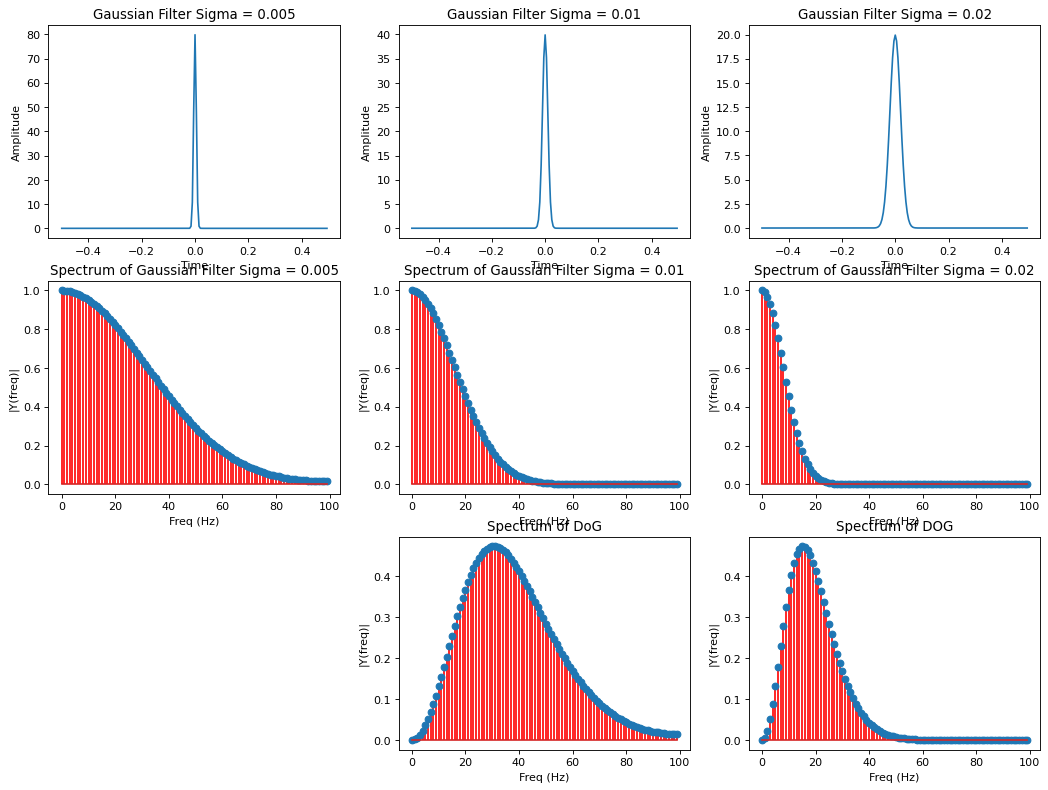

In [5]:
Fs = 200.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
tf=np.arange(-0.5,0.5,Ts) # time vector for filter
filtTitle="Gaussian Filter"
sig=0.005
m=0.0

plt.figure(num=None, figsize=(16,12), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(3,3,1)
filt1=calcGaussian(tf,m,sig)
plt.plot(tf,filt1)
plt.title(filtTitle + " Sigma = "+str(sig))
plt.xlabel('Time')
plt.ylabel('Amplitude')
ymargin=0.05
ymin,ymax=plt.ylim()
plt.ylim(ymin-ymargin,ymax+ymargin)
plt.subplot(3,3,2)
filt2=calcGaussian(tf,m,2*sig)
plt.plot(tf,filt2)
plt.title(filtTitle + " Sigma = "+str(2*sig))
plt.xlabel('Time')
plt.ylabel('Amplitude')
ymargin=0.05
ymin,ymax=plt.ylim()
plt.ylim(ymin-ymargin,ymax+ymargin)
plt.subplot(3,3,3)
filt3=calcGaussian(tf,m,4*sig)
plt.plot(tf,filt3)
plt.title(filtTitle + " Sigma = "+str(4*sig))
plt.xlabel('Time')
plt.ylabel('Amplitude')
ymargin=0.05
ymin,ymax=plt.ylim()
plt.ylim(ymin-ymargin,ymax+ymargin)

plt.subplot(3,3,4)
plotSpectrum(filt1,Fs,title="Spectrum of "+filtTitle+ " Sigma = "+str(sig))
plt.subplot(3,3,5)
plotSpectrum(filt2,Fs,title="Spectrum of "+filtTitle+ " Sigma = "+str(2*sig))
plt.subplot(3,3,6)
plotSpectrum(filt3,Fs,title="Spectrum of "+filtTitle+ " Sigma = "+str(4*sig))
plt.subplot(3,3,8)
plotSpectrum(filt2-filt1,Fs,title="Spectrum of DoG")
plt.subplot(3,3,9)
plotSpectrum(filt3-filt2,Fs,title="Spectrum of DOG")